# IBM Applied Data Science Capstone Project

The Jupyter notebook will be used to complete the capstone project.

In [1]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Business Undertanding: Seattle Car Accident analyses 2004-2020

The City of Seattle through its Department of Transportation provides data free of charge to the public for all accidents and collisions since 2004. The purpose of this open data program has been to increase the safety of traffic, reduce accidents and increase the quality of living of its inhabitants. 

The aim of the analyses is to first understand accident hotspots and their circumstances, then predict the severity of accidents in the future so that the City of Seattle can act upon it to decrease accidents and injuries. We will focus on 2004 to 2020 data.

The data set is rich in details with own geocoding, street names, severity degrees, the weather, light and road condition when the accidents happened. As it covers nearly 200'000 accidents, focus needs to be laid in the analyses as the City of Seattle and its inhabitants benefit more from insights into hotspots and key reasons to change behaviour or infrastructure on Seattle streets.

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns 
import folium
from opencage.geocoder import OpenCageGeocode
!conda install -c conda-forge folium=0.5.0 --yes
print('Folium installed and imported!')
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import datetime

/bin/sh: conda: command not found
Folium installed and imported!


# DATA UNDERSTANDING

In [3]:
data = pd.read_csv ("/Users/Martin/Desktop/Data science capstone project Oct 2020/Coursera Seattle accident analyses/Data-Collisions.csv")

/Users/Martin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Downloading and Loading the Data: The table counts 194'673 accidents of different severity between 2003 and 2020, detailed in 37 + 1 index columns

Internal Police codes are meaningless for this analysis and will be dropped. "SEVERITYDESC" is a verbal repetition of SEVERITYCODE 1 or 2. After deep thought, we decided to drop PEDCYLCOUNTAll to focus on original accidents and the available SEVERITYCODE 1 and 2 descriptions for every accidents. 

In [4]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
data.shape

(194673, 38)

In [6]:
drop_these =['OBJECTID', "INCKEY","COLDETKEY","REPORTNO","STATUS","ADDRTYPE",
             "INTKEY","EXCEPTRSNCODE","EXCEPTRSNDESC","SEVERITYCODE.1","SEVERITYDESC","COLLISIONTYPE","PERSONCOUNT",
             "JUNCTIONTYPE","SDOT_COLCODE","SDOT_COLDESC","PEDCYLCOUNT","PEDROWNOTGRNT","SDOTCOLNUM","ST_COLCODE","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR"]
core_data=data.drop(columns=drop_these)
core_data

,SEVERITYCODE,X,Y,LOCATION,PEDCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,NaN,N,Clear,Dry,Daylight,NaN
194669,1,-122.344526,47.690924,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Y,N,Raining,Wet,Daylight,NaN
194670,2,-122.306689,47.683047,20TH AVE NE AND NE 75TH ST,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,NaN,N,Clear,Dry,Daylight,NaN
194671,2,-122.355317,47.678734,GREENWOOD AVE N AND N 68TH ST,0,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,NaN,N,Clear,Dry,Dusk,NaN


24 columns have been dropped to allow a more focussed and less memory heavy data analysis

In [7]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   LOCATION        191996 non-null  object 
 4   PEDCOUNT        194673 non-null  int64  
 5   VEHCOUNT        194673 non-null  int64  
 6   INCDATE         194673 non-null  object 
 7   INCDTTM         194673 non-null  object 
 8   INATTENTIONIND  29805 non-null   object 
 9   UNDERINFL       189789 non-null  object 
 10  WEATHER         189592 non-null  object 
 11  ROADCOND        189661 non-null  object 
 12  LIGHTCOND       189503 non-null  object 
 13  SPEEDING        9333 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 20.8+ MB


Incidents were inattention column was filled out occured 29'805 times incl NaN. Speeding was documented 9'333 times incl NaN.

In [8]:
core_data['SEVERITYCODE'].value_counts().to_frame('severitycount')

,severitycount
1,136485
2,58188


1=injury; 2= property damage.
Nearly twice as many injuries as property damages occured. For AI / ML purposes, the data set containing number of 1 and 2 severity codes will be balanced to a total of 58'188 each in the next step.

In [9]:
from sklearn.utils import resample

core_data_maj=core_data[core_data.SEVERITYCODE==1]
core_data_min=core_data[core_data.SEVERITYCODE==2]

core_data_maj_dsample=resample(core_data_maj, replace=False, n_samples=58188,random_state=0)

core_data=pd.concat([core_data_maj_dsample,core_data_min])

core_data.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [10]:
core_data

,SEVERITYCODE,X,Y,LOCATION,PEDCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
87036,1,-122.360474,47.525591,DELRIDGE WAY SW BETWEEN SW CLOVERDALE ST AND S...,0,2,2010/11/17 00:00:00+00,11/17/2010 1:11:00 AM,NaN,Y,Raining,Wet,Dark - Street Lights On,NaN
181235,1,-122.309524,47.691686,17TH AVE NE BETWEEN NE 86TH ST AND NE 88TH ST,0,2,2020/01/15 00:00:00+00,1/15/2020 7:43:00 AM,NaN,N,Clear,Ice,Daylight,NaN
55304,1,-122.383230,47.680637,21ST AVE NW BETWEEN NW CANOE PL AND NW 73RD ST,0,2,2007/05/07 00:00:00+00,5/7/2007,NaN,0,Clear,Dry,Unknown,NaN
31262,1,-122.378418,47.690604,NW 85TH ST BETWEEN 16TH AVE NW AND 17TH AVE NW,0,3,2006/04/08 00:00:00+00,4/8/2006,NaN,0,Raining,Wet,Dusk,NaN
71756,1,NaN,NaN,NaN,0,2,2009/09/29 00:00:00+00,9/29/2009 1:00:00 PM,NaN,0,Unknown,Unknown,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,-122.299160,47.579673,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,0,2,2019/01/09 00:00:00+00,1/9/2019 12:51:00 PM,Y,N,Raining,Wet,Daylight,NaN
194666,2,-122.344569,47.694547,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,0,2,2019/01/04 00:00:00+00,1/4/2019 1:46:00 PM,NaN,N,Clear,Wet,Daylight,NaN
194668,2,-122.290826,47.565408,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,NaN,N,Clear,Dry,Daylight,NaN
194670,2,-122.306689,47.683047,20TH AVE NE AND NE 75TH ST,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,NaN,N,Clear,Dry,Daylight,NaN


The dataset has now 116'376 rows equal to 2 times 58'188 values for severity code 1 and 2 incidents.

#### Lets look at some key variables how often they occured

In [11]:
core_data["VEHCOUNT"].value_counts().to_frame('Nr_vehicles')

,Nr_vehicles
2,83651
1,19067
3,8612
0,2883
4,1626
5,377
6,100
7,36
8,10
9,7


In most reported accidents, 2 vehicles were involved

In [12]:
core_data['PEDCOUNT'].value_counts().to_frame('Nr_accidents_pedestrians')

,Nr_accidents_pedestrians
0,109836
1,6297
2,215
3,22
4,4
6,1
5,1


In 109'836 reported accidents, no pedestrian was hurt.

In [13]:
core_data['ROADCOND'].value_counts().to_frame('Nr_accidents_by_Road_condition')

,Nr_accidents_by_Road_condition
Dry,76098
Wet,29149
Unknown,6931
Ice,675
Snow/Slush,534
Other,83
Standing Water,68
Oil,40
Sand/Mud/Dirt,40


Surprisingly, most accidents happened on dry roads. Unfortunatly, in 6'931 cases no road condition was recorded.

In [14]:
core_data['WEATHER'].value_counts().to_frame('weathertypes')

,weathertypes
Clear,67856
Raining,20446
Overcast,16915
Unknown,6965
Snowing,488
Other,432
Fog/Smog/Smoke,362
Sleet/Hail/Freezing Rain,66
Blowing Sand/Dirt,32
Severe Crosswind,15


67'856 accidents happended in clear weather conditions. Unfortunately, in 6'965 cases no weather data was recorded.

In [15]:
core_data['LIGHTCOND'].value_counts().to_frame('light_conditions')

,light_conditions
Daylight,71530
Dark - Street Lights On,29002
Unknown,6122
Dusk,3644
Dawn,1525
Dark - No Street Lights,856
Dark - Street Lights Off,733
Other,128
Dark - Unknown Lighting,7


71'530 incidents happened during daylight.

In [16]:
core_data['SPEEDING'].value_counts().to_frame('speeding_count')

,speeding_count
Y,6048


Speeding played a minor role in accidents with solely 6'048 cases.

In [17]:
hotspots=core_data['LOCATION'].value_counts().to_frame('count').head(15)
hotspots

,count
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,169
6TH AVE AND JAMES ST,165
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,164
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,162
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,156
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,147
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,143
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,142
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,132
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,129


There are clear "hot spots" where accidents happened, ie Battery St Tunnel, N Northgate Way, Aurora Ave, etc. This is demonstrated with the following graph overlaying the accident locations with the Seattle map.

In [18]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = core_data[['Y', 'X']][core_data['Y'].notna()].head(5000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map.save('mymap.html')
map

In [19]:
# Build generic Folium Seattle map
injuries_map = folium.Map(location=[47.61536892, -122.3302243], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

In [20]:
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

# Add data for heatmap 
data_heatmap = core_data[core_data['SEVERITYCODE']==1]
data_heatmap = core_data[['Y','X']]
data_heatmap = core_data.dropna(subset=['Y','X'],axis=0)
data_heatmap = [[row['Y'],row['X']] for index, row in data_heatmap.head(5000).iterrows()] 
data_heatmap

[[47.52559091, -122.3604743],
 [47.6916862, -122.30952420000001],
 [47.68063734, -122.3832297],
 [47.69060413, -122.378418],
 [47.59868287, -122.299901],
 [47.66504255, -122.3707646],
 [47.66799004, -122.28481799999999],
 [47.69874703, -122.35672659999999],
 [47.61886143, -122.326727],
 [47.5749789, -122.32905890000002],
 [47.65551366, -122.3736108],
 [47.52774599, -122.3915861],
 [47.68694144, -122.34585890000001],
 [47.60817661, -122.3279159],
 [47.61860207, -122.35545309999999],
 [47.55786607, -122.2920845],
 [47.67687058, -122.36047990000002],
 [47.5116423, -122.27845490000001],
 [47.65161865, -122.34262690000001],
 [47.66465278, -122.347315],
 [47.58199984, -122.3134017],
 [47.66126195, -122.3119933],
 [47.71934073, -122.3045683],
 [47.6709205, -122.39150459999999],
 [47.61477578, -122.33896429999999],
 [47.57141411, -122.3267255],
 [47.67582933, -122.3173632],
 [47.60910496, -122.32569609999999],
 [47.69746883, -122.29189939999999],
 [47.58117586, -122.38388870000001],
 [47.61524

In [21]:
HeatMap(data_heatmap, radius=12).add_to(injuries_map)

injuries_map.save("injuriesmap.html")
injuries_map

In [22]:
Number_different_spots=core_data["Y"].value_counts()
spots=Number_different_spots

In [23]:
figure_spots=spots.to_frame(name='Number_of_spots_by_latitude')
figure_spots

,Number_of_spots_by_latitude
47.717173,169
47.604161,165
47.708655,162
47.725036,156
47.579673,143
...,...
47.622713,1
47.602660,1
47.708405,1
47.594310,1


The total of 116'376 incidents where spread across 19'634 spots in Seattle taking latitude data. There were 35 key spots with >= 75 incidents per degree of latitude across Seattle in the analysed timeframe.

In [24]:
new=figure_spots[figure_spots.Number_of_spots_by_latitude >= 75]
new.count()

Number_of_spots_by_latitude    35
dtype: int64

In [25]:
core_data['UNDERINFL'].value_counts().to_frame('count')

,count
N,60570
0,47177
Y,3289
1,2657


#### In week 2, analyses for this Capstone project the data preparation and cleaning will be key. Categorical values will be changed into figures. Some descriptions will be amalgamated into one summed up row description. NaN and blank cells/rows will be deleted.

# DATA PREPARATION AND CLEANING

### LOCATION

In [26]:
core_data.drop('LOCATION', inplace=True, axis=1)

LOCATION column was deleted as we have latitude and longitude values already.

### PEDCOUNT

In [27]:
core_data['PEDCOUNT'].replace('N', 0, inplace=True)
core_data['PEDCOUNT'].replace('Y', 1, inplace=True)
core_data['PEDCOUNT'].replace('0', 0, inplace=True)
core_data['PEDCOUNT'].replace('NaN', np.nan, inplace=True)
core_data['PEDCOUNT'].value_counts().to_frame('count')

,count
0,109836
1,6297
2,215
3,22
4,4
6,1
5,1


### INATTENTIONIND

In [28]:
core_data['INATTENTIONIND'].replace('N', 0, inplace=True)
core_data['INATTENTIONIND'].replace('Y', 1, inplace=True)
core_data['INATTENTIONIND'].replace('0', 0, inplace=True)
core_data['INATTENTIONIND'].replace('NaN', np.nan, inplace=True)
core_data['INATTENTIONIND'].value_counts().to_frame('count')

,count
1.0,18749


### UNDERINFL

In [29]:
core_data['UNDERINFL'].replace('N', 0, inplace=True)
core_data['UNDERINFL'].replace('Y', 1, inplace=True)
core_data['UNDERINFL'].replace('0', 0, inplace=True)
core_data['UNDERINFL'].replace('1', 1, inplace=True)
core_data['UNDERINFL'].replace('NaN', np.nan, inplace=True)
core_data['UNDERINFL'].value_counts().to_frame('count')

,count
0.0,107747
1.0,5946


5'946 times alcohol or drugs were recorded in the balanced dataset.

### WEATHER

In [30]:
core_data['WEATHER'].replace({'Overcast':"Impaired_weather",
                              'Snowing':"Impaired_weather",
                              "Fog/Smog/Smoke":"Impaired_weather",
                              "Sleet/Hail/Freezing Rain":"Impaired_weather",
                              "Blowing Sand/Dirt":"Impaired_weather",
                              "Severe Crosswind":"Impaired_weather",
                              "Partly Cloudy":"Impaired_weather",
                              "Raining":"Impaired_weather",
                            "Clear":"Clear_weather"}, inplace=True)

In [31]:
core_data['WEATHER'].replace('Unknown', np.nan, inplace=True)
core_data['WEATHER'].replace('Other', np.nan, inplace=True)
core_data['WEATHER'].replace('NaN', np.nan, inplace=True)
core_data['WEATHER'].value_counts().to_frame('count')

,count
Clear_weather,67856
Impaired_weather,38328


67'856 (63,9%) of accidents occured during clear weather.

### ROADCOND

In [32]:
core_data['ROADCOND'].replace({'Ice':"Impaired road",'Snow/Slush':"Impaired road",
                              "Wet":"Impaired road"}, inplace=True)

Icy, snow and wet road conditions merged into "Impaired road". Rest "Standing Water", "Sand/Mud/Dirt" and "Oil" put to zero and later on dropped as they are rare events.

In [33]:
core_data['ROADCOND'].replace('Unknown', np.nan, inplace=True)
core_data['ROADCOND'].replace('Other', np.nan, inplace=True)
core_data['ROADCOND'].replace('Standing Water', np.nan, inplace=True)
core_data['ROADCOND'].replace('Sand/Mud/Dirt', np.nan, inplace=True)
core_data['ROADCOND'].replace('Oil', np.nan, inplace=True)
core_data['ROADCOND'].replace('NaN', np.nan, inplace=True)
core_data['ROADCOND'].value_counts().to_frame('count')

,count
Dry,76098
Impaired road,30358


### LIGHTCOND

In [34]:
core_data['LIGHTCOND'].replace({'Dark - Street Lights On':"Low_light",'Dusk':"Low_light",
                               "Dawn":"Low_light", "Dark - No Street Lights":"Low_light",
                               "Dark - Street Lights Off":"Low_light",
                               "Dark - Unknown Lighting":"Low_light"}, inplace=True)

In [35]:
core_data['LIGHTCOND'].replace('Unknown', np.nan, inplace=True)
core_data['LIGHTCOND'].replace('Other', np.nan, inplace=True)
core_data['LIGHTCOND'].replace('NaN', np.nan, inplace=True)
core_data['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,71530
Low_light,35767


Most accidents occured during day light. Approximately 1/3 in low light conditions

In [36]:
core_data['SPEEDING'].replace({'Y':1}, inplace=True)
core_data['SPEEDING'].replace(np.nan, 0, inplace=True)
core_data['SPEEDING'].replace('NaN', np.nan, inplace=True)
core_data['SPEEDING'].value_counts().to_frame('count')

,count
0.0,110328
1.0,6048


Speeding was reported in 6'048 incidents while the large majority were involved in accidents without prior speeding.

### TIME

We want to do analyses of incidents by year, month, days and hours. This data will be taken from "INCDATE" and "INCDTTM". For this purpose, both columns with be transposed as datetime64 fields

In [37]:
core_data['INCDATE'] =  pd.to_datetime(core_data['INCDATE'])
core_data['INCDTTM'] =  pd.to_datetime(core_data['INCDTTM'])
core_data['INCDATE']

87036    2010-11-17 00:00:00+00:00
181235   2020-01-15 00:00:00+00:00
55304    2007-05-07 00:00:00+00:00
31262    2006-04-08 00:00:00+00:00
71756    2009-09-29 00:00:00+00:00
                    ...           
194663   2019-01-09 00:00:00+00:00
194666   2019-01-04 00:00:00+00:00
194668   2018-11-12 00:00:00+00:00
194670   2019-01-19 00:00:00+00:00
194671   2019-01-15 00:00:00+00:00
Name: INCDATE, Length: 116376, dtype: datetime64[ns, UTC]

In [38]:
core_data['INCDTTM']

87036    2010-11-17 01:11:00
181235   2020-01-15 07:43:00
55304    2007-05-07 00:00:00
31262    2006-04-08 00:00:00
71756    2009-09-29 13:00:00
                 ...        
194663   2019-01-09 12:51:00
194666   2019-01-04 13:46:00
194668   2018-11-12 08:12:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
Name: INCDTTM, Length: 116376, dtype: datetime64[ns]

In [39]:
core_data['year'] = pd.DatetimeIndex(core_data['INCDATE']).year
core_data['month'] = pd.DatetimeIndex(core_data['INCDATE']).month
core_data['day'] = pd.DatetimeIndex(core_data['INCDATE']).day
core_data['hour'] = pd.DatetimeIndex(core_data['INCDTTM']).hour

In [40]:
core_data.drop(["INCDATE","INCDTTM"], axis=1, inplace=True)
core_data

,SEVERITYCODE,X,Y,PEDCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,year,month,day,hour
87036,1,-122.360474,47.525591,0,2,NaN,1.0,Impaired_weather,Impaired road,Low_light,0.0,2010,11,17,1
181235,1,-122.309524,47.691686,0,2,NaN,0.0,Clear_weather,Impaired road,Daylight,0.0,2020,1,15,7
55304,1,-122.383230,47.680637,0,2,NaN,0.0,Clear_weather,Dry,NaN,0.0,2007,5,7,0
31262,1,-122.378418,47.690604,0,3,NaN,0.0,Impaired_weather,Impaired road,Low_light,0.0,2006,4,8,0
71756,1,NaN,NaN,0,2,NaN,0.0,NaN,NaN,NaN,0.0,2009,9,29,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,-122.299160,47.579673,0,2,1.0,0.0,Impaired_weather,Impaired road,Daylight,0.0,2019,1,9,12
194666,2,-122.344569,47.694547,0,2,NaN,0.0,Clear_weather,Impaired road,Daylight,0.0,2019,1,4,13
194668,2,-122.290826,47.565408,0,2,NaN,0.0,Clear_weather,Dry,Daylight,0.0,2018,11,12,8
194670,2,-122.306689,47.683047,0,2,NaN,0.0,Clear_weather,Dry,Daylight,0.0,2019,1,19,9


### Transform categorical values into dummy variables 0 and 1 regarding INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, SPEEDING

In [41]:
# Get one hot encoding of columns 'INATTENTIONIND'
detail_attention=pd.get_dummies(core_data["INATTENTIONIND"])

#joining of new columns to core dataframe
core_data = core_data.join(detail_attention)

#renaming 1 and 2 regarding INATTENTIONIND
core_data.rename(columns={0.0:'attentive',
                         "nan":"attentive",
                         1.0:'not_attentive'}, 
            inplace=True)

core_data.drop('INATTENTIONIND', inplace=True, axis=1)

print(core_data.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'PEDCOUNT', 'VEHCOUNT', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'year', 'month', 'day',
       'hour', 'not_attentive'],
      dtype='object')


In [42]:
# Get one hot encoding of columns 'UNDERINFL'
detail_influence=pd.get_dummies(core_data["UNDERINFL"])

#joining of new columns to core dataframe
core_data = core_data.join(detail_influence)

#renaming 1 and 2 regarding UNDERINFL
core_data.rename(columns={0.0:'sober_nodrugs',
                         1.0:'under_influence'}, 
            inplace=True)

core_data.drop('UNDERINFL', inplace=True, axis=1)

print(core_data.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'PEDCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'year', 'month', 'day', 'hour',
       'not_attentive', 'sober_nodrugs', 'under_influence'],
      dtype='object')


In [43]:
# Get one hot encoding of columns 'WEATHER'
detail_weather=pd.get_dummies(core_data["WEATHER"])

#joining of new columns to core dataframe
core_data = core_data.join(detail_weather)

#renaming 1 and 2 regarding WEATHER
core_data.rename(columns={1.0:'Clear_weather',
                         2.0:"Impaired_weather"}, 
            inplace=True)

core_data.drop('WEATHER', inplace=True, axis=1)

print(core_data.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'PEDCOUNT', 'VEHCOUNT', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'year', 'month', 'day', 'hour',
       'not_attentive', 'sober_nodrugs', 'under_influence', 'Clear_weather',
       'Impaired_weather'],
      dtype='object')


In [44]:
# Get one hot encoding of columns 'ROADCOND'
detail_road=pd.get_dummies(core_data["ROADCOND"])

#joining of new columns to core dataframe
core_data = core_data.join(detail_road)

#renaming 1 and 2 regarding ROADCOND
core_data.rename(columns={1.0:'Dry road',
                         2.0:"Impaired road"}, 
            inplace=True)

core_data.drop('ROADCOND', inplace=True, axis=1)

print(core_data.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'PEDCOUNT', 'VEHCOUNT', 'LIGHTCOND',
       'SPEEDING', 'year', 'month', 'day', 'hour', 'not_attentive',
       'sober_nodrugs', 'under_influence', 'Clear_weather', 'Impaired_weather',
       'Dry', 'Impaired road'],
      dtype='object')


In [45]:
# Get one hot encoding of columns 'LIGHTCOND'
detail_light=pd.get_dummies(core_data["LIGHTCOND"])

#joining of new columns to core dataframe
core_data = core_data.join(detail_light)

#renaming 1 and 2 regarding LIGHTCOND
core_data.rename(columns={0.0:'Daylight',
                         1.0:'Low_light'}, 
            inplace=True)

core_data.drop('LIGHTCOND', inplace=True, axis=1)

print(core_data.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'PEDCOUNT', 'VEHCOUNT', 'SPEEDING', 'year',
       'month', 'day', 'hour', 'not_attentive', 'sober_nodrugs',
       'under_influence', 'Clear_weather', 'Impaired_weather', 'Dry',
       'Impaired road', 'Daylight', 'Low_light'],
      dtype='object')


In [46]:
core_data.isnull().sum(axis=0)

SEVERITYCODE           0
X                   2875
Y                   2875
PEDCOUNT               0
VEHCOUNT               0
SPEEDING               0
year                   0
month                  0
day                    0
hour                   0
not_attentive          0
sober_nodrugs          0
under_influence        0
Clear_weather          0
Impaired_weather       0
Dry                    0
Impaired road          0
Daylight               0
Low_light              0
dtype: int64

In [47]:
core_data.dropna(subset = ["X"], inplace=True)

In [48]:
core_data.isnull().sum(axis=0)

SEVERITYCODE        0
X                   0
Y                   0
PEDCOUNT            0
VEHCOUNT            0
SPEEDING            0
year                0
month               0
day                 0
hour                0
not_attentive       0
sober_nodrugs       0
under_influence     0
Clear_weather       0
Impaired_weather    0
Dry                 0
Impaired road       0
Daylight            0
Low_light           0
dtype: int64

2'875 rows were deleted that contained NaN or Null values in the geolocation X and Y. Finally the index was reset and named "Index"

In [49]:
core_data = core_data.reset_index(drop=True)
core_data.index.names = ["Index"]

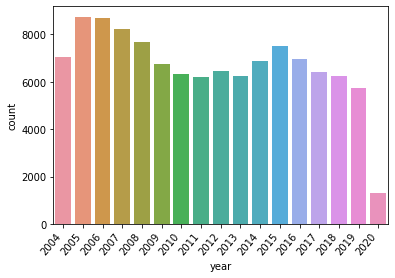

In [50]:
ax = sns.countplot(core_data['year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, 
                   horizontalalignment='right')
plt.show()

Reported accidents have decreased since 2015 despite more growth in population. According to U.S. Censur data displayed by a Seattle newspaper, the number of households with one or more cars has decreased since 2010. This is reflected in fewer accidents above.

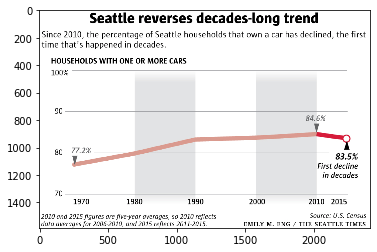

In [51]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread("/Users/Martin/Desktop/Seattle car ownership.png") 
  
# Output Images 
plt.imshow(img) 

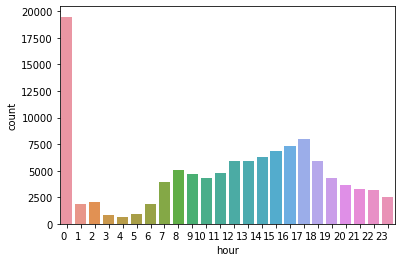

In [52]:
ax = sns.countplot(core_data['hour'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, 
                   horizontalalignment='right')
plt.show()

In [53]:
# deleting "0" hour as it is meaningless and disturbs the distribution
core_data= core_data[core_data.hour>0]

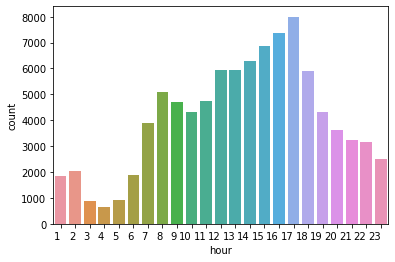

In [54]:
ax = sns.countplot(core_data['hour'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, 
                   horizontalalignment='right')
plt.show()

In [55]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94005 entries, 0 to 113500
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEVERITYCODE      94005 non-null  int64  
 1   X                 94005 non-null  float64
 2   Y                 94005 non-null  float64
 3   PEDCOUNT          94005 non-null  int64  
 4   VEHCOUNT          94005 non-null  int64  
 5   SPEEDING          94005 non-null  float64
 6   year              94005 non-null  int64  
 7   month             94005 non-null  int64  
 8   day               94005 non-null  int64  
 9   hour              94005 non-null  int64  
 10  not_attentive     94005 non-null  uint8  
 11  sober_nodrugs     94005 non-null  uint8  
 12  under_influence   94005 non-null  uint8  
 13  Clear_weather     94005 non-null  uint8  
 14  Impaired_weather  94005 non-null  uint8  
 15  Dry               94005 non-null  uint8  
 16  Impaired road     94005 non-null  uint8

#### The cleaned up and balanced dataset contains 113'501 documented accidents and detailed in 20 columns

### VISUALISATIONS OF CORRELATIONS

In [56]:
corr = core_data.corr()

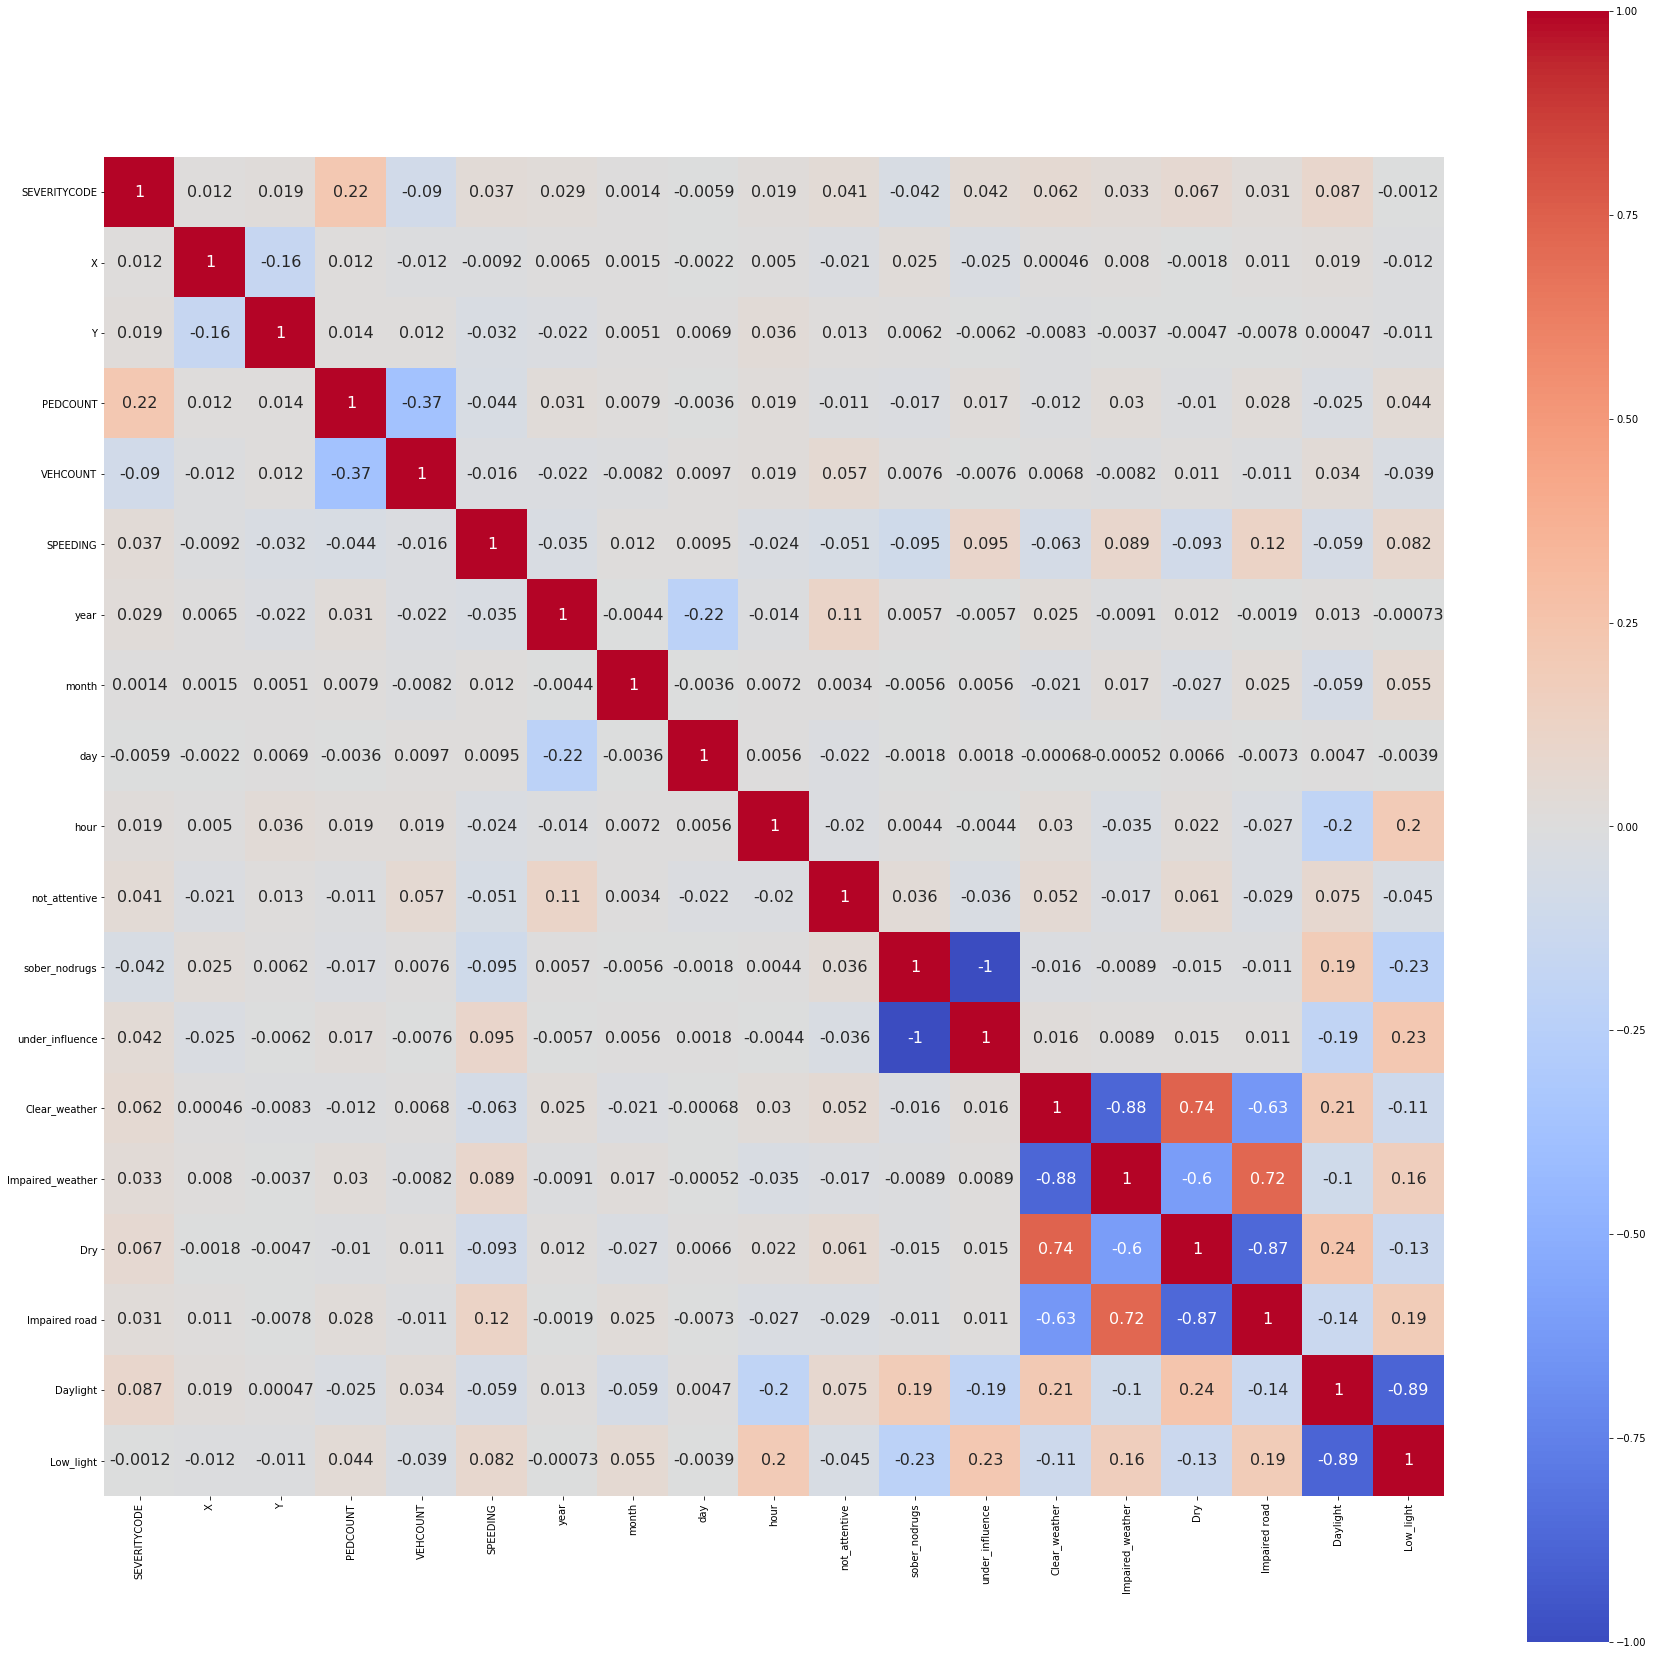

In [57]:
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True,cmap='coolwarm',annot_kws={'size':16},square=True)
plt.savefig('correlation.png')

In [58]:
core_data.drop('X', inplace=True, axis=1)
core_data.drop('year', inplace=True, axis=1)
core_data.drop('day', inplace=True, axis=1)
core_data.drop('month', inplace=True, axis=1)
core_data.drop('VEHCOUNT', inplace=True, axis=1)
core_data.drop('Low_light', inplace=True, axis=1)
core_data.drop('sober_nodrugs', inplace=True, axis=1)
core_data

,SEVERITYCODE,Y,PEDCOUNT,SPEEDING,hour,not_attentive,under_influence,Clear_weather,Impaired_weather,Dry,Impaired road,Daylight
Index,,,,,,,,,,,,
0,1,47.525591,0,0.0,1,0,1,0,1,0,1,0
1,1,47.691686,0,0.0,7,0,0,1,0,0,1,1
4,1,47.598683,0,0.0,8,1,0,1,0,1,0,1
5,1,47.665043,0,0.0,9,0,0,1,0,1,0,1
6,1,47.667990,0,0.0,14,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113496,2,47.579673,0,0.0,12,1,0,0,1,0,1,1
113497,2,47.694547,0,0.0,13,0,0,1,0,0,1,1
113498,2,47.565408,0,0.0,8,0,0,1,0,1,0,1


#### Most attributes are solely weakly correlated with one another. 

In [59]:
corr_matrix=core_data.corr()
corr_matrix["SEVERITYCODE"].sort_values(ascending=False)

SEVERITYCODE        1.000000
PEDCOUNT            0.218847
Daylight            0.086818
Dry                 0.067139
Clear_weather       0.061531
under_influence     0.041806
not_attentive       0.041212
SPEEDING            0.036627
Impaired_weather    0.033409
Impaired road       0.030822
Y                   0.019469
hour                0.018782
Name: SEVERITYCODE, dtype: float64

Summary:

# MODELING

#### Data Scaling

Due to sensitivity of correlation and Machine Learning algorithms used later on, all data get scaled with StandardScaler

In [60]:
# Applying standard scaler to attributes
from sklearn import preprocessing
x = core_data.drop(['SEVERITYCODE'], axis=1)
y = core_data[['SEVERITYCODE']]
core_data_scaled = preprocessing.StandardScaler().fit(x).transform(x)
core_data_scaled[0:3]

array([[-1.65133794, -0.24759854, -0.22703602, -2.40477173, -0.45854783,
         4.4278769 , -1.23448894,  1.40787368, -1.44348457,  1.66292539,
        -1.35439233],
       [ 1.25937403, -0.24759854, -0.22703602, -1.26163529, -0.45854783,
        -0.22584187,  0.81005181, -0.710291  , -1.44348457,  1.66292539,
         0.7383385 ],
       [-0.37044886, -0.24759854, -0.22703602, -1.07111255,  2.18079757,
        -0.22584187,  0.81005181, -0.710291  ,  0.69276806, -0.60134989,
         0.7383385 ]])

In [61]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(core_data_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [62]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(75204, 11)
(18801, 11)


In [63]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(75204, 1)
(18801, 1)


## LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(X_train, y_train)
logRegModel

/Users/Martin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
yHat = logRegModel.predict(X_test)

In [66]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.59      0.47      0.52      9161
           2       0.58      0.69      0.63      9640

    accuracy                           0.58     18801
   macro avg       0.58      0.58      0.57     18801
weighted avg       0.58      0.58      0.58     18801



In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, yHat))

Accuracy: 0.5808201691399394


Accuracy answers how often the classifier is correct. Precision answers how often positive tuples are labeled correctly. Precision with Logistic regression is slightly lower on property damage incidents (severitycode=2) than on injuries.

## KNN

In [69]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.572522738152226


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.67      0.60      9161
           2       0.60      0.48      0.53      9640

    accuracy                           0.57     18801
   macro avg       0.58      0.57      0.57     18801
weighted avg       0.58      0.57      0.57     18801



Precision is lower on injury incidents (severitycode=1) than on property damages with KNN method while n=8.

In [72]:
# try K=1 through K=7 and record testing accuracy
k_range = range(1, 8)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 8
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.5625232700388277, 0.5552364235944897, 0.570980267007074, 0.5618850061166959, 0.5715653422690282, 0.5693846072017446, 0.5777884155098133]


Text(0, 0.5, 'Testing Accuracy')

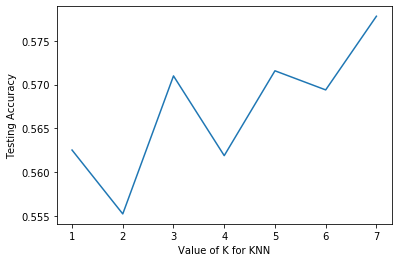

In [73]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

KNN with n=7 displayed highest testing accuracy in this range

## DECISION TREE CLASSIFIER

In [74]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(X_train, y_train)
dTreeModel

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
yHatDTC = dTreeModel.predict(X_test)

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, yHatDTC))

Accuracy: 0.5795968299558534


In [77]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.59      0.47      0.52      9161
           2       0.58      0.69      0.63      9640

    accuracy                           0.58     18801
   macro avg       0.58      0.58      0.57     18801
weighted avg       0.58      0.58      0.58     18801



Precision is slightly lower on property damage incidents (severitycode=2) than on injuries with DTC method.

## SUPPORT VECTOR MODEL

In [78]:
from sklearn import svm
clf=svm.SVC(kernel="linear")
clf.fit(X_train,y_train)
y_predSVM=clf.predict(X_test)

/Users/Martin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
print("Accuracy:", metrics.accuracy_score(y_test,y_predSVM))

Accuracy: 0.578905377373544


In [80]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           1       0.61      0.38      0.47      9161
           2       0.57      0.77      0.65      9640

    accuracy                           0.58     18801
   macro avg       0.59      0.57      0.56     18801
weighted avg       0.59      0.58      0.56     18801



Precision is lower on property damage incidents (severitycode=2) than on injuries with SVM model.

SVM is not suitable for large datasets because of its high calculation time.

#### In Conclusion:
the accuracy rates of the tested methods differed by a small range. Logistic regression achieved an accuracy of 0.578. KNN achieved 0.603 with n=7, the Decision Tree Classifier 0.604 and SVM achieved 0.579 after a long calculation time. In terms of precision to categorize injuries the SVM model was best with 0.61.
The analysis showed that many factors contributed to the 116'376 incidents reported over 2004 to 2020. The model is ready to be applied to special focus areas such as locations with high number of incidents as we have seen earlier, detailed analysis by hour as most accidents happened during "rush hour" between 16:00h and 17:00h or in special weather conditions. Fortunately, accidents due to drivers tested for being under influence was small.